In [1]:
import pyforest

ModuleNotFoundError: No module named 'pyforest'

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [11]:
x.shape

(768, 8)

In [12]:
y.shape

(768,)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [14]:
x_train.shape

(614, 8)

In [15]:
y_test.shape

(154,)

# LR

In [16]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
accuracy_score(y_test,y_pred)

0.7272727272727273

In [18]:
accuracy_score(y_train,lr.predict(x_train))

0.7638436482084691

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

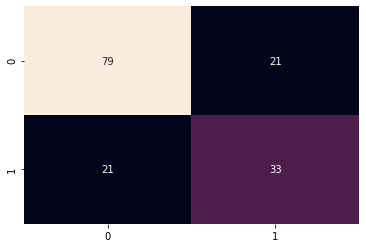

In [21]:
cm = confusion_matrix(y_test,y_pred)
 
cm_df = pd.DataFrame(data=cm,columns=['0','1'],index=['0','1'])
 
sns.heatmap(cm_df,annot=True,cbar=False,fmt='d')
plt.show()

In [22]:
cv = cross_validate(lr,x,y,cv=5,n_jobs=-1,scoring='accuracy')

In [23]:
cv

{'fit_time': array([0.1406908 , 0.13470912, 0.15864325, 0.04687572, 0.15464973]),
 'score_time': array([0.00199342, 0.0019927 , 0.00299382, 0.0009985 , 0.00299597]),
 'test_score': array([0.74025974, 0.70779221, 0.74675325, 0.83006536, 0.75816993])}

In [27]:
cv['test_score']

array([0.74025974, 0.70779221, 0.74675325, 0.83006536, 0.75816993])

In [26]:
cv['test_score'].mean()

0.7566080977845684

# K-NN

In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.6948051948051948

In [31]:
accuracy_score(y_train,knn.predict(x_train))

0.7899022801302932

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

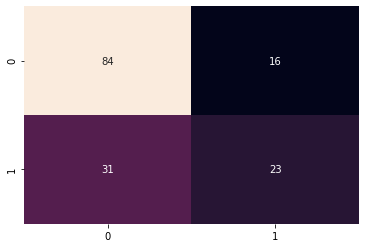

In [32]:
cm = confusion_matrix(y_test,y_pred)
 
cm_df = pd.DataFrame(data=cm,columns=['0','1'],index=['0','1'])
 
sns.heatmap(cm_df,annot=True,cbar=False,fmt='d')
plt.show()

In [33]:
cv = cross_validate(knn,x,y,cv=5,n_jobs=-1,scoring='accuracy')

In [34]:
cv['test_score']

array([0.72727273, 0.72727273, 0.7012987 , 0.75816993, 0.70588235])

In [35]:
cv['test_score'].mean()

0.723979288685171

In [36]:
x[1]

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ])

In [37]:
std  = StandardScaler()
data = std.fit_transform(x)

In [38]:
data[1]

array([-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
       -0.68442195, -0.36506078, -0.19067191])

In [39]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=100)

In [41]:
x_train.shape

(614, 8)

In [42]:
y_test.shape

(154,)

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.6753246753246753

In [45]:
cv = cross_validate(knn,data,y,cv=5,n_jobs=-1)

In [46]:
cv['test_score']

array([0.72077922, 0.73376623, 0.71428571, 0.77124183, 0.7254902 ])

In [47]:
cv['test_score'].mean()

0.733112638994992